In [27]:
import re
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

# sys.path.insert(0, '../')

from jas1101finalproject.GlobularCluster import GlobularCluster
from jas1101finalproject.plot import LogNorm, AsinhNorm
from jas1101finalproject.utils import profile_binning, clip_quantile_nd
from jas1101finalproject.cluster import DBSCAN_Clustering

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from argparse import Namespace
from jas1101finalproject.data import DATA_PATH

opts = Namespace()
opts.output_dir = DATA_PATH

# from jas1101finalproject.scripts.get_globular_clusters import main
# main(opts=opts)

from jas1101finalproject.scripts.normalize_globular_clusters import main
main(opts=opts)

  3%|▎         | 4/150 [00:48<36:38, 15.06s/it]  

Whiting_1 failed


  4%|▍         | 6/150 [00:50<19:13,  8.01s/it]

Pal_1 failed


  5%|▍         | 7/150 [00:51<13:48,  5.79s/it]

AM_1 failed


  5%|▌         | 8/150 [00:52<10:04,  4.26s/it]

Eridanus failed


 11%|█▏        | 17/150 [01:12<04:47,  2.16s/it]

Pal_3 failed


 13%|█▎        | 19/150 [01:25<08:28,  3.88s/it]

Pal_4 failed


 13%|█▎        | 20/150 [01:26<06:19,  2.92s/it]

Crater failed


 29%|██▉       | 44/150 [03:32<04:39,  2.63s/it]

Pal_14 failed


 41%|████      | 61/150 [04:46<04:32,  3.06s/it]

Pal_15 failed


 50%|█████     | 75/150 [06:00<06:36,  5.29s/it]/Users/nathanielstarkman/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/nathanielstarkman/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/nathanielstarkman/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/nathanielstarkman/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/nathanielstarkman/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/Users/nathanielstarkman/miniconda3/lib/python3.7/site-packages/matplo

no good pm
IC_1257 failed


 99%|█████████▊| 148/150 [11:01<00:04,  2.37s/it]

Pal_12 failed


 99%|█████████▉| 149/150 [11:02<00:01,  1.88s/it]

Pal_13 failed


100%|██████████| 150/150 [11:03<00:00,  4.42s/it]

NGC_7492 failed


In [19]:
# from jas1101finalproject.scripts import normalize_globular_clusters
# normalize_globular_clusters.main(opts=opts)

In [124]:
raise Exception

Exception: 

## Example 1 :Tuc 47

In [48]:
GC = GlobularCluster.from_name('NGC_104_47Tuc', member_threshold=0.0)

Text(0,0.5,'Y')

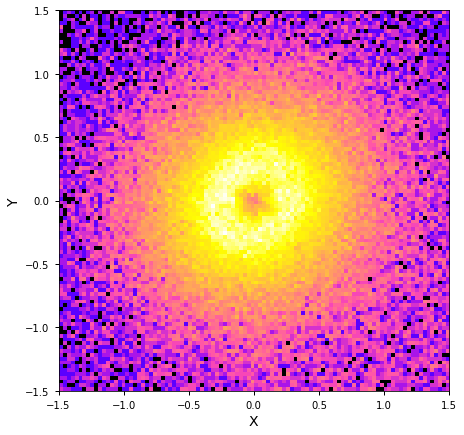

In [49]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

Text(0.5,0,'R')

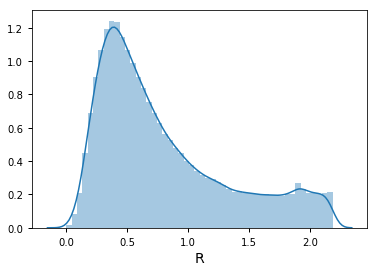

In [50]:
sns.distplot(GC.r)
plt.xlabel("R")

Text(0,0.5,'PMY')

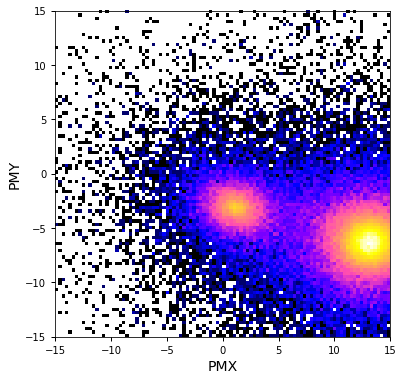

In [51]:
from matplotlib import colors
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.pmx, GC.pmy, bins=100, range=[[-15,15],[-15,15]], norm=colors.LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

Text(0,0.5,'PM')

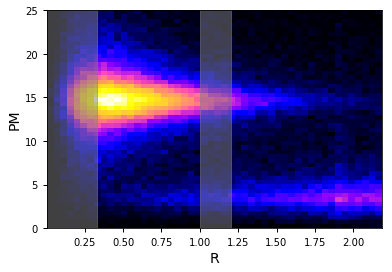

In [52]:
sel = GC.pm < 25
H, xb, yb, _ = plt.hist2d(GC.r[sel], GC.pm[sel], bins=50, norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 1.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [53]:
X0 = np.vstack([GC.r, GC.pm]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[0,1])

X = X0[good_pm]

In [54]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # if use DBSCAN : eps = 0.5

Clustering using HDBSCAN
Clustering Finished: 2 components


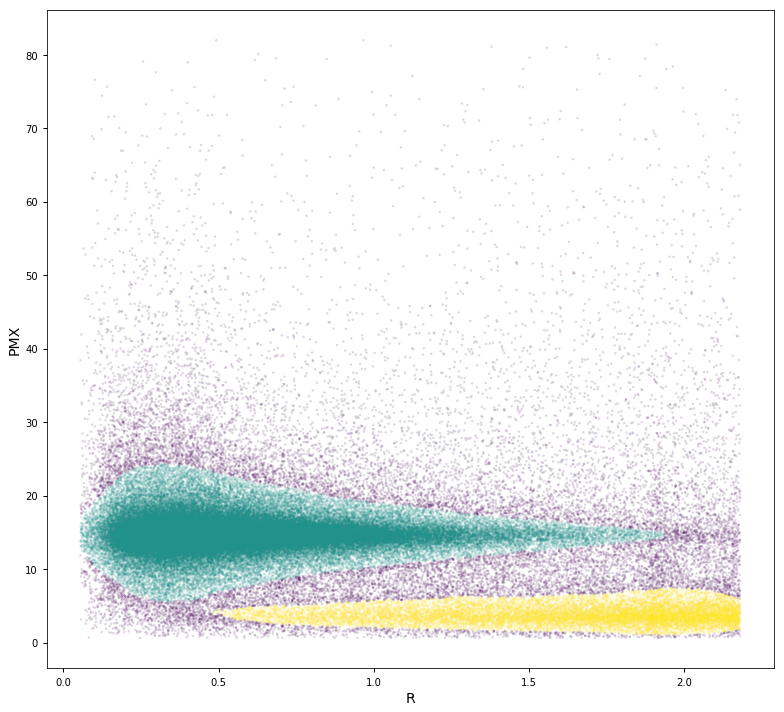

In [55]:
clus.plot_clustering()

In [56]:
is_mp = clus.predict_main_pop()

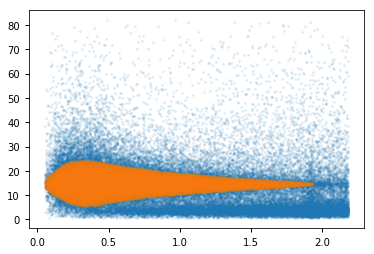

In [57]:
plt.scatter(X[:,0], X[:,1], s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], X[is_mp][:,1], s=3, alpha=0.1)

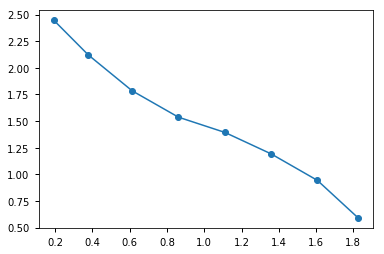

In [58]:
from astropy.stats import mad_std

bins=np.linspace(0.0, 2, 9)
r_rbin, z_rbin, z_bins = profile_binning(X[is_mp][:,0], X[is_mp][:,1], bins=bins, plot=False)
plt.plot(r_rbin, [mad_std(z_bins[i]['pm']) for i in range(len(z_bins))],'o-')

# plt.plot(GC.r, sigmar_2(GC.r, 1e6, 24, 0))
# sigmar_2(GC.r, 1e6, 24, 0).to_value('km**2/s**2') / (4.5*u.kpc * np.tan(0.399) / u.yr).to_value('km/s')**2

In [59]:
member_prob = np.zeros(len(GC.pmx))
member_prob[np.where(good_pm)[0][is_mp]] = 1

sel = member_prob > 0.8

Text(0,0.5,'PMY')

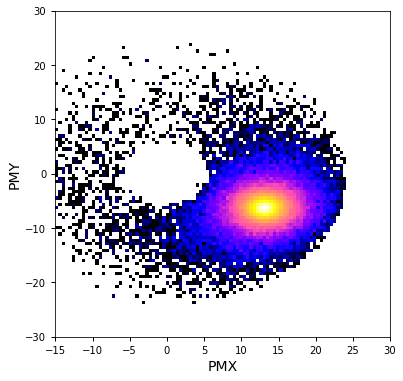

In [60]:
from matplotlib import colors
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.pmx[sel], GC.pmy[sel], bins=100, range=[[-15,30],[-30,30]], norm=colors.LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

((array([-4.32723361, -4.12763557, -4.0190429 , ...,  4.0190429 ,
          4.12763557,  4.32723361]),
  array([ 4.4927384 ,  5.56713   ,  5.56900258, ..., 24.22416367,
         24.28836775, 24.30703437])),
 (2.403951452685948, 14.778646228933633, 0.9866037107791304))

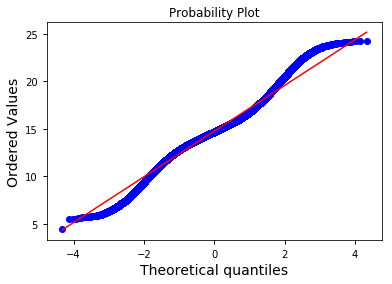

In [47]:
from scipy import stats

# sns.distplot(GC.pm[sel])
stats.probplot(GC.pm[sel], dist='norm', plot=plt.gca())

## Example 2 : M22

In [ ]:
drct = r"../scripts/get_globular_clusters/"
gc_name = "NGC_6656_M_22"

GC = GlobularCluster.from_directory(gc_name, drct)
GC.df.to_pandas().describe()

In [ ]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.df["pmx"], GC.df["pmy"], bins=100, range=[[-15,15],[-20,10]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

In [ ]:
H, xb, yb, _ = plt.hist2d(GC.r, GC.pm, bins=50, range=[[0,1.2],[0,20]], norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 1.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [ ]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])

X = X0[good_pm]

In [ ]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # if use DBSCAN : eps = 0.3

In [ ]:
clus.plot_clustering()

In [ ]:
is_mp = clus.predict_main_pop()

plt.scatter(X[:,0], X[:,1], s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], X[is_mp][:,1], s=3, alpha=0.1)

In [ ]:
r_rbin, z_rbin, z_bins = profile_binning(GC.r, GC.pm, bins=bins, plot=False)
plt.plot(r_rbin, [mad_std(z_bins[i]['pm']) for i in range(len(z_bins))],'o-')


## Example 2 : M71

In [ ]:
drct = r"../scripts/get_globular_clusters/"
gc_name = "NGC_6838_M_71"

GC = GlobularCluster.from_directory(gc_name, drct)
GC.df.to_pandas().describe()

In [ ]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.df["pmx"], GC.df["pmy"], bins=100, range=[[-15,15],[-20,10]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

In [ ]:
H, xb, yb, _ = plt.hist2d(GC.r, GC.pm, bins=50, range=[[0,1.2],[0,12]], norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 1.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [ ]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])

X = X0[good_pm]

In [ ]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # DBSCAN : eps = 0.3

In [ ]:
clus.plot_clustering()

In [ ]:
is_mp = clus.predict_main_pop()

plt.scatter(X[:,0], X[:,1], s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], X[is_mp][:,1], s=3, alpha=0.1)